In [1]:
#begin with getting our stuff together the way we've been doing the whole time
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Admin\Documents\Dec 22 Instacart Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

In [4]:
df.shape

(32404859, 34)

The exercise steps were done in a separate notebook; I'll submit that with the other two. It's the one called 4.9 Visualizations

# Histogram for hour of day

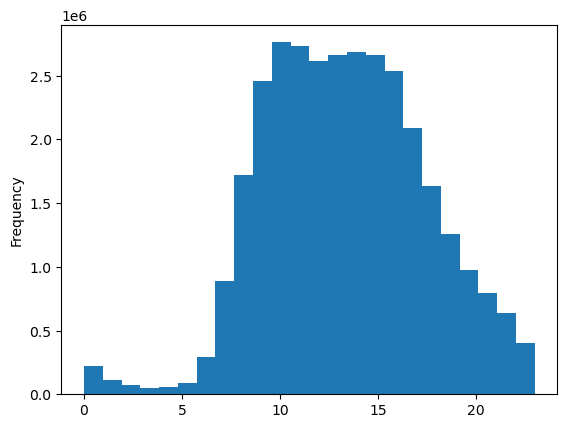

In [5]:
#we can do 24 bins for 24 hours of the day
hist = df['order_hour_of_day'].plot.hist(bins = 24)

So as you might expect, we can see that the most orders are made in the middle of the day and drop off in the evening with very few of them happening overnight. 9am to 4pm is the busiest range. 

In [6]:
#let's save this, we'll probably need it later!
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours_of_day.png'))

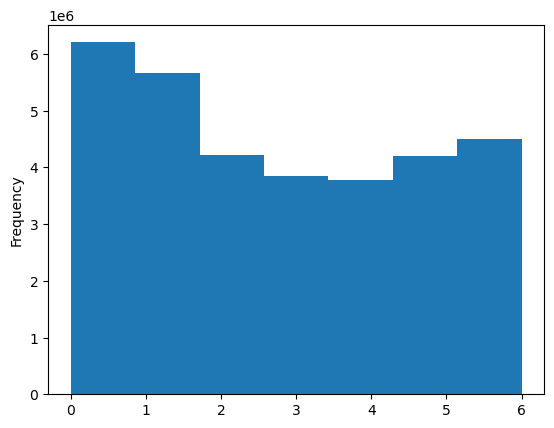

In [29]:
hist = df['orders_day_of_week'].plot.hist(bins = 7)

In [30]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_days_of_week.png'))

# Bar chart based on loyalty status

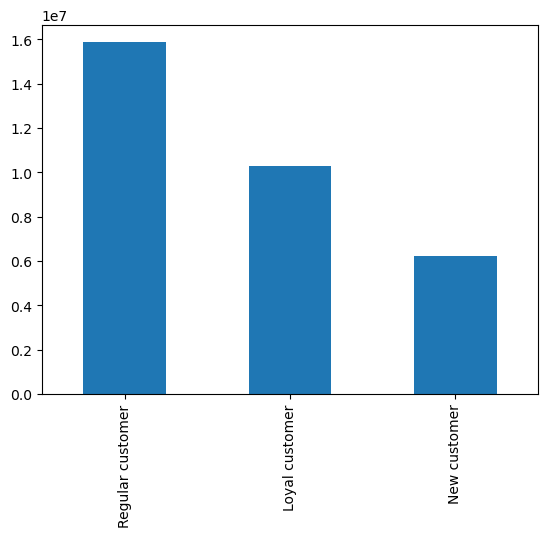

In [54]:
bar = df['loyalty_flag'].value_counts().plot.bar()

This seems like a weird request since the loyalty flag was already based on the number of orders someone has made through Instacart. What we're seeing is which tier of customer ordered the most individual items, so while a regular customer has made fewer orders than a loyal customer, they also tend to have bigger orders. Alternately, there are just significantly more regular customers overall. As is, I don't think this chart can tell us all that much and we need more information to come to a conclusion. Anyway I miss Tableau. 

In [55]:
#let's save this thing tho
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# Line chart from hours of day

In [9]:
#WAIT before we do this I want to get that 15k cottage cheese out of there or it's gonna mess with our visual
df.loc[df['prices'] >100, 'prices'] = np.nan

## we start by making a sample

In [10]:
np.random.seed(69)
dev = np.random.rand(len(df)) <= 0.7

In [11]:
#now we make our 2 separate dataframes based on the two groups we just created aka 70 and 30 percent
yuge = df[dev]
weeniehutjr = df[~dev]

In [12]:
#double checking
len(df)

32404859

In [13]:
len(yuge) + len(weeniehutjr)

32404859

success!

## now we can make our chart

In [14]:
#my laptop is already not happy about all this, so let's make a smaller dataframe
dfsub = weeniehutjr[['order_hour_of_day', 'prices']]

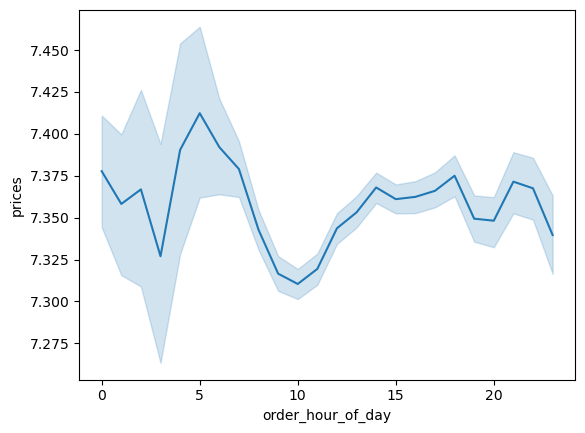

In [15]:
line = sns.lineplot(data = dfsub, x = 'order_hour_of_day',y = 'prices')

this looks very odd because we saw the fewest products being ordered in the middle of the night, but now we see the most expensive products are being ordered between like 4 and 6am. I'm curious to know what all is being ordered so early. We could also make a line chart based on order cost and or value counts to see if the biggest orders are being placed at that time, but man, my laptop is already not liking making these charts. Maybe another time we'll try it. 

In [16]:
#now to save this
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours_prices.png'))

# Line chart describing age vs number of dependents

In [17]:
#we already have our samples made, we can just make another line chart with different criteria. first, a smaller dataframe
dfsub2 = weeniehutjr[['age', 'n_dependents']]

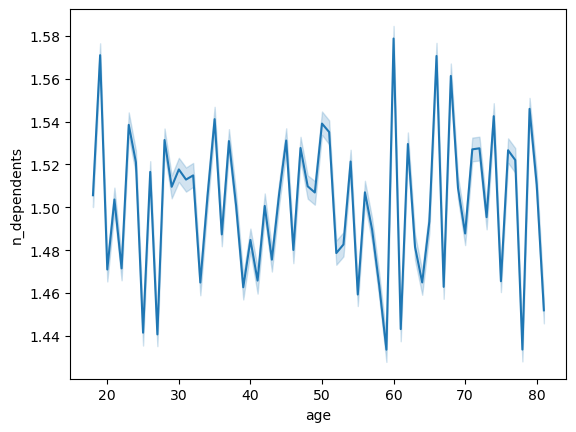

In [18]:
#then the chart
line = sns.lineplot(data = dfsub2, x = 'age',y = 'n_dependents')

so on the one hand, it looks like there's no correlation between the two at all. A trendline would be pretty horizontal if you tried to put one across this thing. On the other, the steps on our y axis are really small. They're like 20% of a dependent apart and that really doesn't make any sense.

In [19]:
#we'll save it anyway
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

<AxesSubplot:xlabel='age', ylabel='n_dependents'>

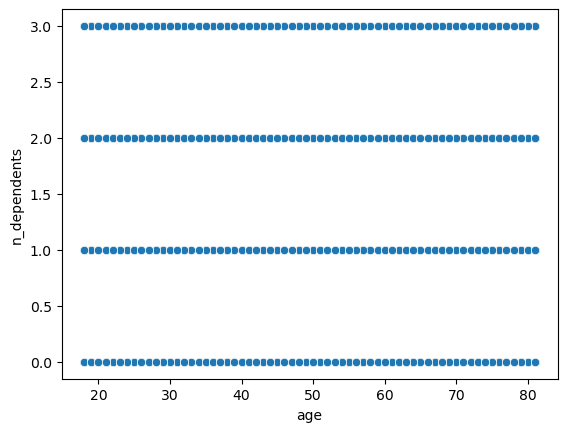

In [20]:
#let's try a scatterplot to see if that changes the picture
sns.scatterplot(x = 'age', y = 'n_dependents',data = dfsub2)

what in the absolute tarnation

yeah I'm going to say there's not any correlation between the two. 

# Scatterplot of age vs annual income

In [21]:
#we do the same steps as before. first, the smaller dataframe
dfsub3 = weeniehutjr[['age', 'annual_income']]

In [22]:
dfsub3.head()

,age,annual_income
1,48,165665
3,48,165665
10,48,165665
11,48,165665
14,48,165665


In [ ]:
#then make the scatterplot
plot = sns.scatterplot(x = 'age', y = 'annual_income',data = dfsub3)

In [24]:
#save it
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

so it's sort of hard to see what's going on with this amount of data, but you can see that once you break 200k annually, you get more of the 40+ crowd, then after breaking 400k, you have exclusively 40 years old and up. There is a correlation in that the more wealthy you are past 200k, the more likely you are to be over 40, but the opposite isn't true: the lower annual incomes seem to represent all ages pretty equally. With the y axis being so huge, however, we don't have a nuanced view at all of what's happening. 100k jumps is enormous in this context. Let's make a different plot but limit it to ppl who make under 100k annually. 

In [25]:
dfsub4 = dfsub3.loc[dfsub3['annual_income'] < 100000]

In [26]:
dfsub4.head(15)

,age,annual_income
30,36,59285
35,36,59285
41,36,59285
50,36,59285
52,36,59285
53,36,59285
57,36,59285
63,36,59285
64,36,59285
66,36,59285


<AxesSubplot:xlabel='age', ylabel='annual_income'>

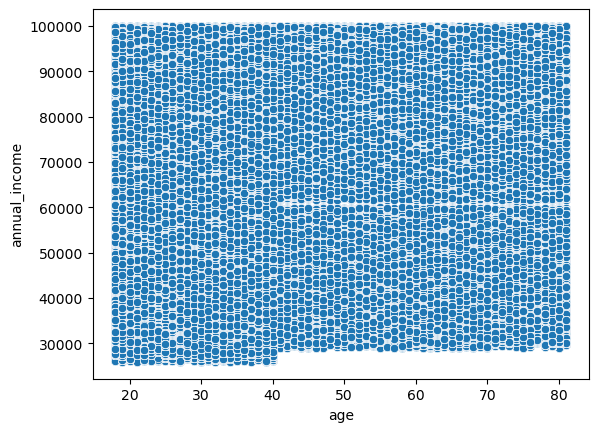

In [27]:
sns.scatterplot(x = 'age', y = 'annual_income',data = dfsub4)

ok yup there isn't a correlation under 100k except you really only go below 30k under age 40 and working with this many data points is officially insane

In [ ]:
bar = df['department_id'].value_counts().plot.bar()

In [32]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments.png'))

In [48]:
df2 = df[['user_id', 'loyalty_flag']]

In [49]:
df2.head()

,user_id,loyalty_flag
0,26711,New customer
1,26711,New customer
2,26711,New customer
3,26711,New customer
4,26711,New customer


In [50]:
df2 = df2.drop_duplicates()

In [51]:
df2.shape

(206209, 2)

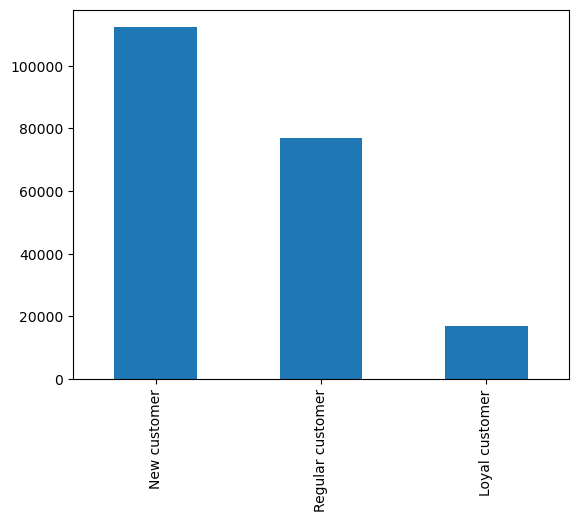

In [52]:
bar = df2['loyalty_flag'].value_counts().plot.bar()

In [53]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))